# EDA for the imported data

### Generic imports lines and util functions that do not directly correlate to the actual analysis

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

from src.utils.config import load_config, ensure_dirs

def get_path(p: str) -> str:
    """
    Return the absolute path of a file in the project
    :param p: file's path to get the path for
    :return: the absolute path of the file
    """
    current_dir = os.path.sep.join(os.getcwd().split(os.path.sep)[:-2])
    return os.path.join(current_dir, p)

cfg = load_config(get_path("config.yaml"))


### Merging the imported files

Merges the imported files in the interim directory and concat them into a single df for analysis.

In [69]:
interim_data_path = get_path(cfg["paths"]["interim_dir"])

dfs = []
recorded_labels = set()
for d in os.listdir(interim_data_path):
    temp_df = pd.read_csv(os.path.join(interim_data_path, str(d)))
    df_label = str(temp_df["label"].iloc[0])
    recorded_labels.add(df_label)
    dfs += [temp_df]

df = pd.concat(dfs, axis=0, ignore_index=True)

In [70]:
print(f"Number of records: {len(df)} with {len(recorded_labels)} unique labels")

Number of records: 67 with 2 unique labels


In [71]:
# Remove bootstrap entries
df = df[df["context"] != "bootstrap"]

In [72]:
df.shape

(64, 14)

In [73]:
df.head()

,session_id,avg_dx,avg_cpm,shortcut_count,median_cpm,avg_hold_time,context,avg_dy,avg_scroll_distance,keystroke_count,duration,avg_click_interval,clicks_per_minute,label
1,e15995e2-f720-448b-a462-29790b6026f9,11.663448,0.00,1.0,0.00,0.220285,capture,16.709401,27.666667,0.0,5.258685,0.583301,137.150555,user1
2,22bb78a9-7453-4eee-a7e0-e6ea553471cd,11.663448,0.00,2.0,0.00,0.202468,capture,16.709401,27.666667,0.0,0.439291,0.583301,137.150555,user1
3,6769fb36-fb77-43e8-8242-aa92fd73b9bc,6.750049,0.00,2.0,0.00,0.172079,capture,11.176953,27.666667,1.0,2.811189,1.108256,67.673896,user1
4,297de8a4-9b17-409b-931d-f3ff0c543672,NaN,0.00,1.0,0.00,0.143253,capture,NaN,0.000000,0.0,0.649208,0.000000,0.000000,user1
5,f939b55b-a9d8-4f71-b7e0-4f56ee27d5e2,2.950094,460.62,2.0,485.54,0.082152,capture,4.759445,24.454545,147.0,84.336796,13.013376,6.147521,user1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 1 to 66
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           64 non-null     object 
 1   avg_dx               61 non-null     float64
 2   avg_cpm              64 non-null     float64
 3   shortcut_count       64 non-null     float64
 4   median_cpm           64 non-null     float64
 5   avg_hold_time        64 non-null     float64
 6   context              64 non-null     object 
 7   avg_dy               61 non-null     float64
 8   avg_scroll_distance  64 non-null     float64
 9   keystroke_count      64 non-null     float64
 10  duration             64 non-null     float64
 11  avg_click_interval   64 non-null     float64
 12  clicks_per_minute    64 non-null     float64
 13  label                64 non-null     object 
dtypes: float64(11), object(3)
memory usage: 7.5+ KB


### Handling null values

In [75]:
df.isnull().sum()

session_id             0
avg_dx                 3
avg_cpm                0
shortcut_count         0
median_cpm             0
avg_hold_time          0
context                0
avg_dy                 3
avg_scroll_distance    0
keystroke_count        0
duration               0
avg_click_interval     0
clicks_per_minute      0
label                  0
dtype: int64

In [76]:
df.fillna(0, inplace=True)

In [77]:
df.isnull().sum()

session_id             0
avg_dx                 0
avg_cpm                0
shortcut_count         0
median_cpm             0
avg_hold_time          0
context                0
avg_dy                 0
avg_scroll_distance    0
keystroke_count        0
duration               0
avg_click_interval     0
clicks_per_minute      0
label                  0
dtype: int64

### Feature distribution

In [79]:
df_label = []
for label in recorded_labels:
    subset = df[df["label"] == label]
    df_label.append(subset)

numeric_cols = df.select_dtypes('number').columns

In [85]:
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

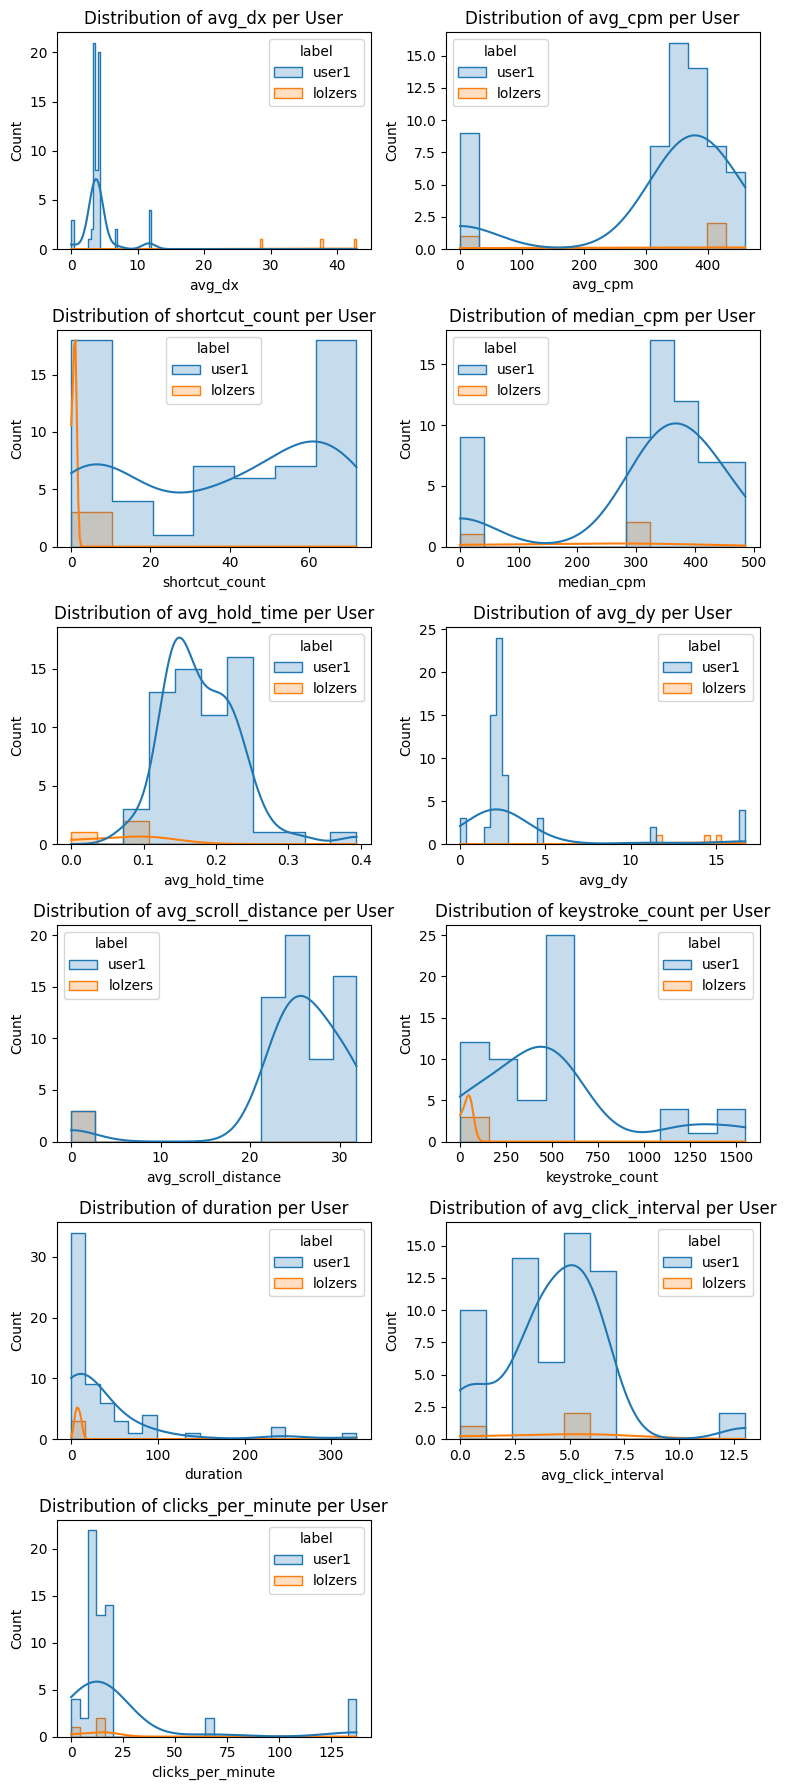

In [83]:
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='label', kde=True, element='step')
    plt.title(f"Distribution of {col} per User")
    plt.tight_layout()

plt.show()

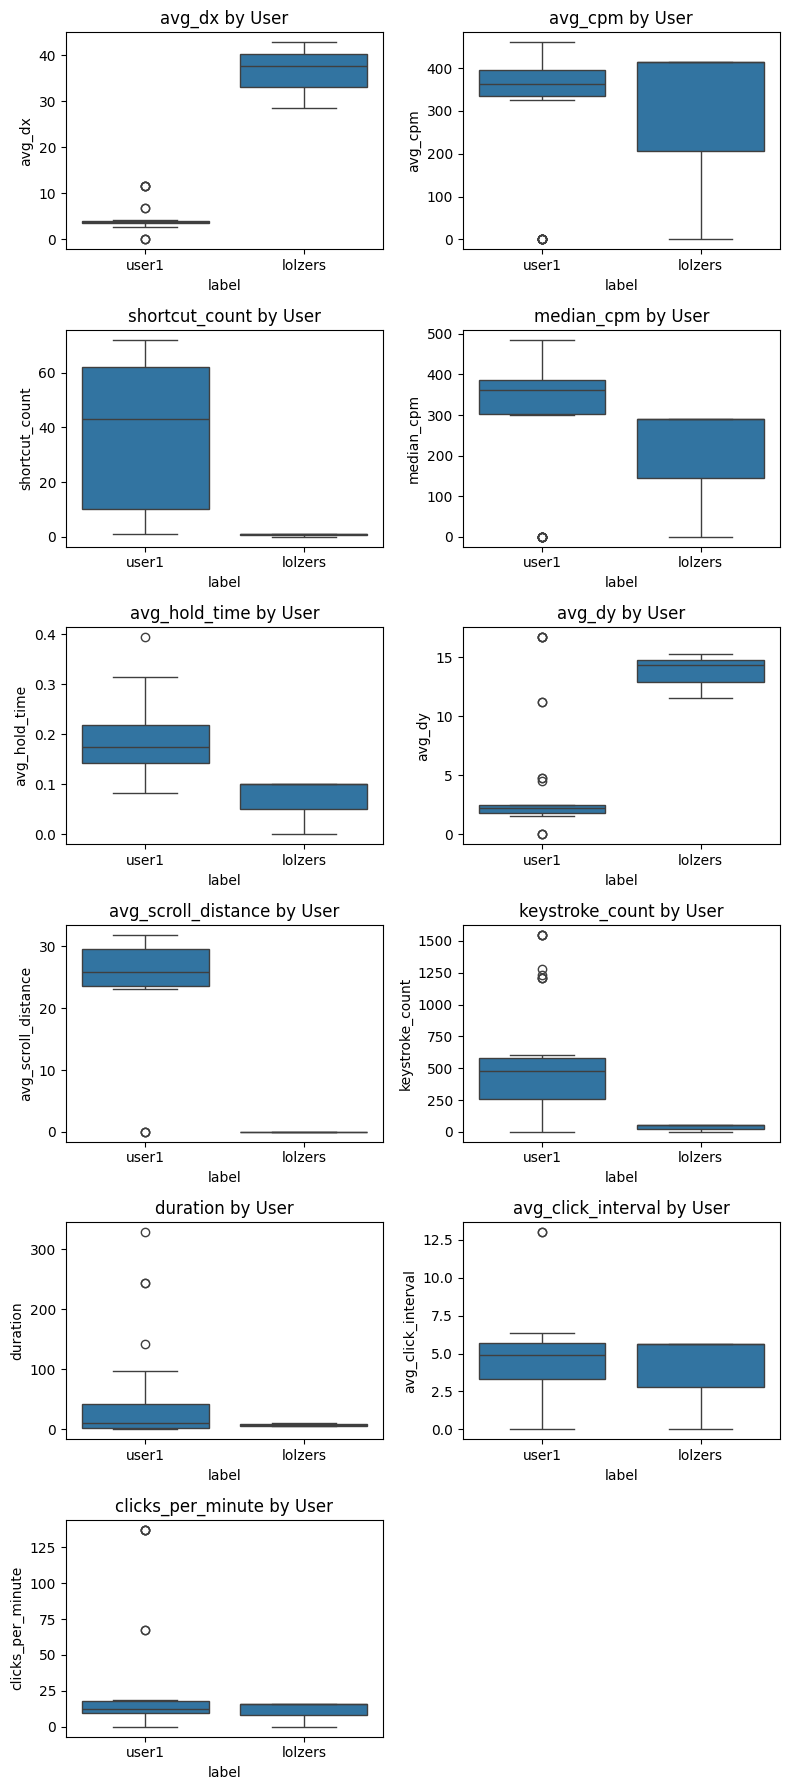

In [86]:
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"{col} by User")
    plt.tight_layout()

plt.show()